##### Les Membres Du Groupe (GL4): 
Mehdi Ben Salha <br>
Zakaria Soussi <br>
Med Amine Bouchnak


Text(0, 0.5, 'feature 2')

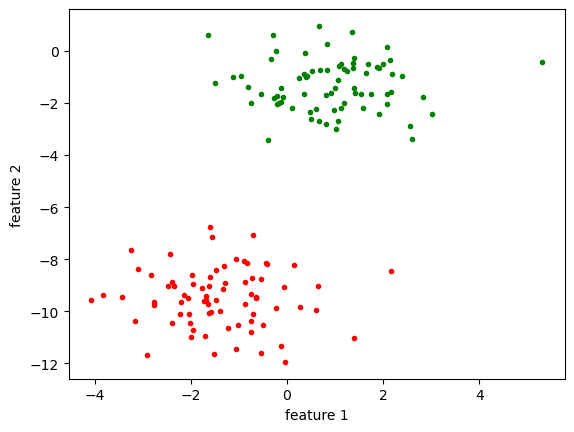

In [8]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X, y = datasets.make_blobs (n_samples=150, n_features=2,centers=2, cluster_std=1.05,random_state=2)

plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r.')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'g.')
plt.xlabel("feature 1") 
plt.ylabel("feature 2")


In [10]:
def acti_func(z):

#activation function: pour l'utiliser dans l'algorithme de Perceptron
    if z>0:
        return 1.0 #on retourne un float
    else:
        return 0

In [11]:
def perceptron(X, y, lr, epochs):


    m, n = X.shape
 
    w=np.random.rand(3,1)* 1e-4

    n_miss_list = []
    # Training.
    for epoch in range(epochs):
        n_miss = 0
        # looping for every example.
        for idx, x_i in enumerate(X):
        # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1) 
            y_hat = acti_func(np.dot(x_i.T, w))
            if (np.squeeze(y_hat) - y[idx]) != 0:
                w+=lr*(y[idx]-y_hat)*x_i
                n_miss+=1
          
        n_miss_list.append(n_miss)
    return w, n_miss_list
            # variable to store #misclassified.


In [12]:
def plot_decision_boundary(X, w):

    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[1]/w[2]
    c = -w[0]/w[2]
    x2 = m*x1 + c
    # Plotting

    plt.plot(x1,x2,'g',label='decision boundary')#tracer le ligne de décision(séparation entre les deux clusters en vert)

In [13]:
w, _=perceptron(X,y,0.000001,50) 


Text(0.5, 1.0, 'Decision boundary of 2 classes')

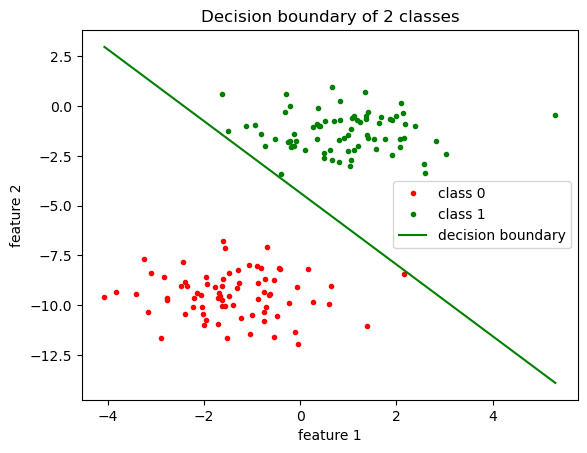

In [14]:

plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r.',label='class 0')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'g.',label='class 1')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plot_decision_boundary(X,w)
plt.legend()
plt.title('Decision boundary of 2 classes')


In [15]:
def make_normal_data(m1,m2,s1,s2):


  #on fait les deux classes (0 pour les 125 premiers et 1 pour les derniers 125) dans un numpy array
  y = np.array([])
  for i in range(250):
    if i < 125:
      y = np.append(y, 1)
    else:
      y = np.append(y, 0)
  #on fait deux distribution gausiennes chaqune composée 125 ligne et 2 colonnes
  normal_1 = np.random.normal(m1, s1, size=(125, 2))
  normal_2 = np.random.normal(m2, s1, size=(125, 2))
  normal_X= np.concatenate((normal_1, normal_2), axis=0)

  train_normal_data, test_normal_data, train_labels, test_labels = train_test_split(normal_X, y, test_size=0.2, random_state=42)

  return (normal_X, y, train_normal_data, test_normal_data, train_labels, test_labels)


In [16]:
def perceptron(X, y, lr, epochs):


    m, n = X.shape
    # Initializing parameters(theta) to zeros.
    # +1 in n+1 for the bias term.

    w=np.random.rand(3,1)* 1e-2
    # Empty list to store how many examples were
    # misclassified at every iteration.
    n_miss_list = []
    # Training.
    for epoch in range(epochs):
        n_miss = 0
        # looping for every example.
        for idx, x_i in enumerate(X):
        # Insering 1 for bias, X0 = 1.
            #np.insert() va insérer la valeur (3éme argument ) dans l'axe et l'indexe speicifiés (on va faire des simples exemples dans les cellueles suivantes)
            x_i = np.insert(x_i, 0, 1).reshape(-1,1) #reshape(-1,1) removes all 1 dimensions  (on va faire des simples exemples dans les cellueles suivantes)
            # Calculating prediction/hypothesis.
            y_hat = acti_func(np.dot(x_i.T, w))
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                w+=lr*(y[idx]-y_hat)*x_i
                n_miss+=1
            # Incrementing by 1.
            # Appending number of misclassified examples
            # at every iteration.
        n_miss_list.append(n_miss)
    return w, n_miss_list
            # variable to store #misclassified.

In [17]:
def predict(X,w):
    
    m, n = X.shape
    predicted_labels =[]
    for idx, x_i in enumerate(X):
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            # Calculating prediction/hypothesis.
            y_hat = acti_func(np.dot(x_i.T, w))
            predicted_labels.append(y_hat)
    return predicted_labels

#2. Expérience 1 : Générer un dataset pour σ1²=σ2²=0.25

In [18]:
_,_,train_normal_data_exp1, test_normal_data_exp1,train_labels_exp1, test_labels_exp1 = make_normal_data((-1, 0), (1, 0), 0.25, 0.25)


In [19]:
#Exécuter Perceptron sur le training data
w_exp1,_=perceptron(train_normal_data_exp1,train_labels_exp1,0.1,100)


Text(0.5, 1.0, 'Decision boundary of 2 classes')

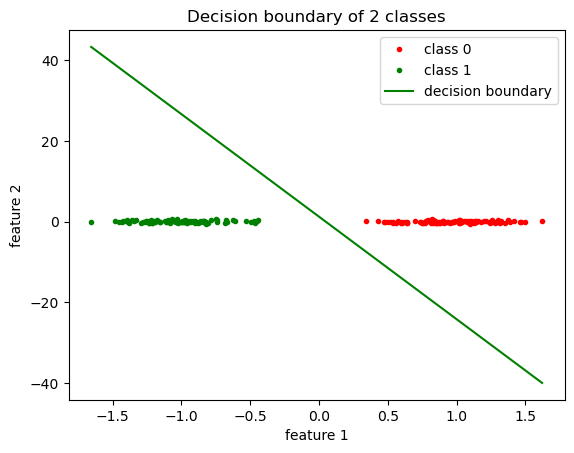

In [21]:

plt.plot(train_normal_data_exp1[:, 0][train_labels_exp1 == 0], train_normal_data_exp1[:, 1][train_labels_exp1 == 0], 'r.',label='class 0')
plt.plot(train_normal_data_exp1[:, 0][train_labels_exp1 == 1], train_normal_data_exp1[:, 1][train_labels_exp1 == 1], 'g.',label='class 1 ')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plot_decision_boundary(train_normal_data_exp1,w_exp1)
plt.legend()
plt.title('Decision boundary of 2 classes')

a. L'algorithme converge-t-il ? Pourquoi ?

-OUI,l'algorithme converge il sépare les deux clusters grace au sigma petite=0.25 qui génére une bonne dataset

b. Tracez la limite de décision trouvée par votre algorithme. Cette limite de décision est-elle unique ? La modification de l'initialisation modifie-t-elle le résultat de l'algorithme ?

-NON, cette décision n'est pas unique. Elle dépend de l'initialisation des weights,nombre d'epochs et la valeur de learning rate

c. Calculer la justesse (accuracy) de la classification sur l'ensemble de test. Tracez la limite de décision sur l'ensemble de test

In [22]:
predicted_exp1 = predict(test_normal_data_exp1, w_exp1)
score = accuracy_score(predicted_exp1, test_labels_exp1)
print(f'accuracy =  {int(score)} ')

accuracy =  1 


Text(0.5, 1.0, 'Decision boundary of 2 classes: Test Data')

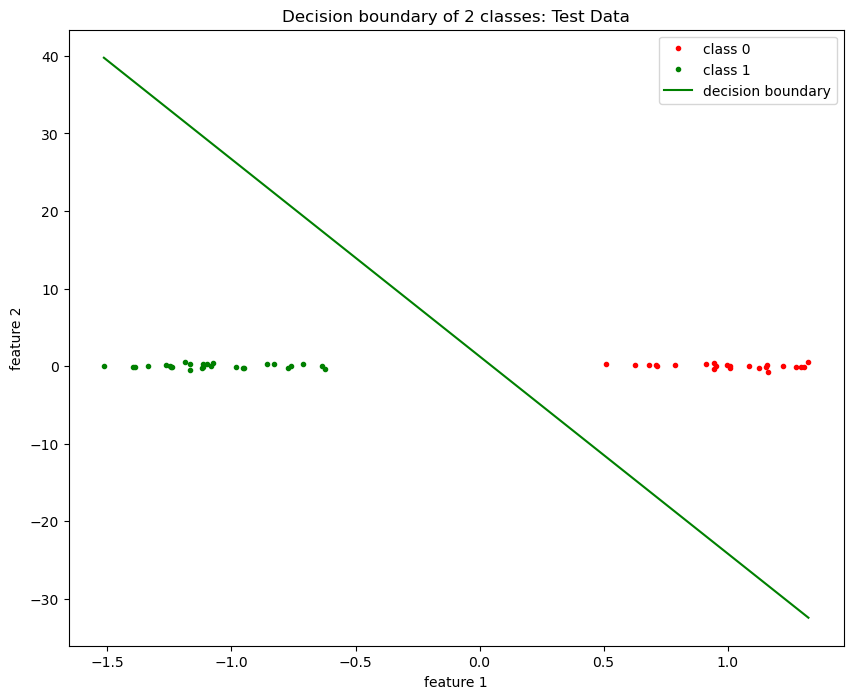

In [23]:
#tracer la limite de décision sur l'ensemble de test
fig = plt.figure(figsize=(10,8))
plt.plot(test_normal_data_exp1[:, 0][test_labels_exp1 == 0], test_normal_data_exp1[:, 1][test_labels_exp1 == 0], 'r.',label='class 0')
plt.plot(test_normal_data_exp1[:, 0][test_labels_exp1 == 1], test_normal_data_exp1[:, 1][test_labels_exp1 == 1], 'g.',label='class 1')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plot_decision_boundary(test_normal_data_exp1,w_exp1)
plt.legend()
plt.title('Decision boundary of 2 classes: Test Data')



##3. Expérience 2 : Générer un dataset pour σ1²=σ2²=0.75

In [29]:
_,_,train_normal_data_exp2, test_normal_data_exp2,train_labels_exp2, test_labels_exp2 = make_normal_data((-1, 0), (1, 0), 0.75, 0.75)


In [30]:
#Exécuter Perceptron sur le training data
w_exp2,_=perceptron(train_normal_data_exp2,train_labels_exp2,0.1,100)


Text(0.5, 1.0, 'Decision boundary of 2 classes')

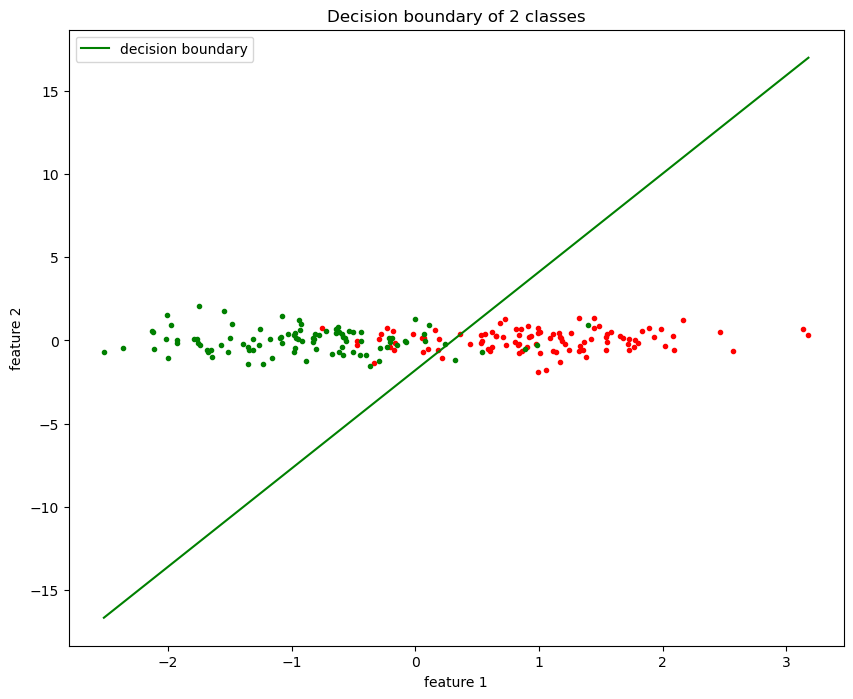

In [31]:
fig = plt.figure(figsize=(10,8))
plt.plot(train_normal_data_exp2[:, 0][train_labels_exp2 == 0], train_normal_data_exp2[:, 1][train_labels_exp2 == 0], 'r.')
plt.plot(train_normal_data_exp2[:, 0][train_labels_exp2 == 1], train_normal_data_exp2[:, 1][train_labels_exp1 == 1], 'g.')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plot_decision_boundary(train_normal_data_exp2,w_exp2)
plt.legend()
plt.title('Decision boundary of 2 classes')

a. L'algorithme converge-t-il ? Pourquoi ?

-NON,l'algorithme ne converge pas (malgré il semble qu'il fait une bonne classification selon la distribution dataset)

b. Tracez la limite de décision trouvée par votre algorithme. Cette limite de décision est-elle unique ? La modification de l'initialisation modifie-t-elle le résultat de l'algorithme ?

-NON, cette décision n'est pas unique. Elle dépend de l'initialisation des weights,nombre d'epochs et la valeur de learning rate

In [32]:
predicted_exp2 = predict(test_normal_data_exp2, w_exp2)
score = accuracy_score(predicted_exp2, test_labels_exp2)
print(f'accuracy =  {score} ')

accuracy =  0.92 


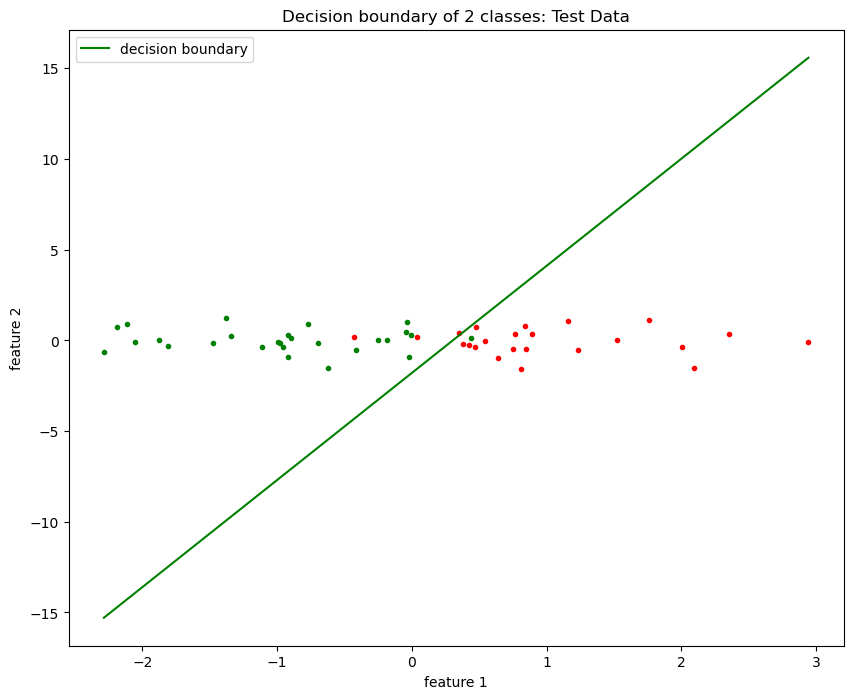

In [33]:
#tracer la limite de décision sur l'ensemble de test
fig = plt.figure(figsize=(10,8))
plt.plot(test_normal_data_exp2[:, 0][test_labels_exp2 == 0], test_normal_data_exp2[:, 1][test_labels_exp2 == 0], 'r.')
plt.plot(test_normal_data_exp2[:, 0][test_labels_exp2 == 1], test_normal_data_exp2[:, 1][test_labels_exp2 == 1], 'g.')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plot_decision_boundary(test_normal_data_exp2,w_exp2)
plt.title('Decision boundary of 2 classes: Test Data')
plt.legend()

#4. Expérience 3 : Nous définissons une expérience comme suit :
• Générez les données et entraînez votre modèle.
• Calculez l'erreur sur l'ensemble de test.
Afin d'étudier l'impact de la variation de σ2 1et σ22 sur les performances du système, nous stockons l'erreur sur plusieurs expériences (prendre nb expérience = 30). Puis on calcule la moyenne et la variance des erreurs stockées. Pour chaque σ1 2et σ22 ∈ [0.01, 0.1, 0.5, 0.7]
calculez la moyenne et la variance puis tracez les résultats en utilisant matplotlib.pyplot.errorbar

error_bar:Error bars function used as graphical enhancement that visualizes the variability of the plotted data on a Cartesian graph. Error bars can be applied to graphs to provide an additional layer of detail on the presented data

In [22]:
def ensemble_perceptron(n_experiences, s1, s2,):
 
  test_errors=[] #stocker les valeurs des erreurs
  for i in range(n_experiences):
   
    _,_,train_normal_data, test_normal_data,train_labels, test_labels = make_normal_data((-1, 0), (1, 0), s1, s2) #generate gaussian dataset 30
    w,_=perceptron(train_normal_data,train_labels,0.1,100)
    predicted = predict(test_normal_data, w)
    test_errors.append(1-accuracy_score(predicted, test_labels))

  mean_error = np.mean(test_errors)#calculer la moyenne des erreurs (30 valeurs -> 1 valeur)
  std_error = np.std(test_errors)#calculer la std des erreurs

  return mean_error,std_error





CPU times: total: 1min 6s
Wall time: 1min 6s


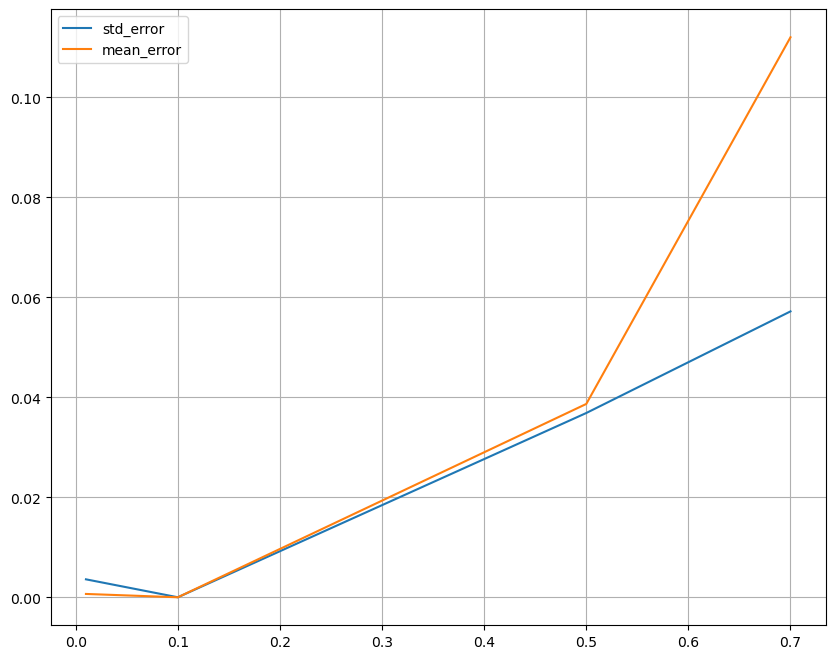

In [23]:
%%time

mean_errors=[]
std_errors=[]
fig = plt.figure(figsize=(10,8))
for sigmas in [0.01, 0.1, 0.5, 0.7]:
  error,std=ensemble_perceptron(30,sigmas,sigmas)
  mean_errors.append(error)
  std_errors.append(std)
plt.grid()
plt.errorbar([0.01, 0.1, 0.5, 0.7], std_errors,label='std_error')
plt.errorbar([0.01, 0.1, 0.5, 0.7], mean_errors,label='mean_error')
plt.legend()



##Commenter le résultat:
La résulat de Cette expérience a montré que sigma a un grand effet sur l'accuracy de la classification.Nous voyons bien que quand sigma augumente l'erreur augumente de vitesse variable et ceci est justifié par le role de standard deviation qui controle les variances des clusters(comme on a choisi une grande valeur de std et une petite valeur au dessus).
On doit donc chercher a minimiser l'erreur selon sigma pour que l'algorithme de Perceptron soit optimal.